In [6]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import math
import hashlib
import os

# Task 1: Binary Represnetations


 *An unsigned integer is a 32-bit datum that encodes a nonnegative integer in the range [0 to 4294967295].

### Left Rotation 
`rotl` rotates the bits in a 32-bit unsigned integer `x` to the left by `n` places.

In [4]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 3.2 Operations on Words

def rotl(x, n=1):

    # This is to ensure x is a 32-bit unsigned integer
    x = x & 0xFFFFFFFF 

    #This is to ensure n is within the range of 0 to 31
    n = n % 32
    
    return ((x << n) | (x >> (32 - n))) & 0xFFFFFFFF # Return the result of rotationg x left by n bits

### Example:

In [5]:
# Left rotation 
x = 5
print(format(x, '032b')) # 5 in 32 bits

# Rotate 5 to the left by 1
print(format(rotl(x), '032b'))

00000000000000000000000000000101
00000000000000000000000000001010


### Right Rotation
`rotr` rotates the bits in a 32-bit unsigned integer `x` to the right `n` places.

In [6]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 3.2 Operations on Words

def rotr(x, n=1):
    
    # This is to ensure x is a 32-bit unsigned integer
    x = x & 0xFFFFFFFF 

    #This is to ensure n is within the range of 0 to 31
    n = n % 32
    return ((x >> n) | (x << (32 - n))) & 0xFFFFFFFF # Return the result of rotationg x right

### Example:

In [7]:
x = 2
print(format(x, '032b')) # 2 in 32 bits

# Rotate 2 to the right by 1
print(format(rotr(x), '032b'))

00000000000000000000000000000010
00000000000000000000000000000001


### Choice Function (ch)
The `ch(x,y,z)` function choose bits from `y` where `x` is 1, and bits from `z` where `x` is 0.

Formula: `ch(x,y,z) = (x & y) ^ (~x & z)`

In [8]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 4.1.1 SHA-1 Functions
def ch(x, y, z):
    
    # Is to ensure all inputs are 32-bit unsigned integers
    x = x & 0xFFFFFFFF # selector
    y = y & 0xFFFFFFFF
    z = z & 0xFFFFFFFF

    return ((x & y) ^ (~x & z)) & 0xFFFFFFFF # Return the result of the choice function

#### Pattern 1
Hex: `0xFF00FF00`  
Binary: `11111111 00000000 11111111 00000000`

#### Pattern 2
Hex: `0xAAAAAAAA`  
Binary: `10101010 10101010 10101010 10101010`

#### Pattern 3
Hex: `0x55555555`  
Binary: `01010101 01010101 01010101 01010101

In [9]:
x = 0xFF00FF00  # Pattern of 1s and 0s
y = 0xAAAAAAAA  # Pattern for bits selected by 1s in x
z = 0x55555555  # Pattern for bits selected by 0s in x

result = ch(x, y, z)
print(f"x: {format(x, '032b')}")
print(f"y: {format(y, '032b')}")
print(f"z: {format(z, '032b')}")
print(f"r: {format(result, '032b')}")

x: 11111111000000001111111100000000
y: 10101010101010101010101010101010
z: 01010101010101010101010101010101
r: 10101010010101011010101001010101


### Majority Function (maj)
The `maj(x,y,z)` function performs a bitwise majority vote. For each bit position, the output is 1 if at least two of the corresponding bits in x, y, and z are 1.

Formula: `maj(x,y,z) = (x & y) ^ (x & z) ^ (y & z)`

In [10]:
# Reference: https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf
# Section 4.1.1 SHA-1 Functions
def maj(x, y, z):
    # Ensure all inputs are 32-bit unsigned integers
    x = x & 0xFFFFFFFF
    y = y & 0xFFFFFFFF
    z = z & 0xFFFFFFFF
    
    return ((x & y) ^ (x & z) ^ (y & z)) & 0xFFFFFFFF

In [11]:
# Test maj function with the same patterns as ch
x = 0xFF00FF00  # Pattern 1
y = 0xAAAAAAAA  # Pattern 2
z = 0x55555555  # Pattern 3

result = maj(x, y, z)
print(f"x: {format(x, '032b')}")
print(f"y: {format(y, '032b')}")
print(f"z: {format(z, '032b')}")
print(f"r: {format(result, '032b')}")

x: 11111111000000001111111100000000
y: 10101010101010101010101010101010
z: 01010101010101010101010101010101
r: 11111111000000001111111100000000


# Task 2: Hash Functions

In this task, I've implemented the hash function from *The C Programming Language* by Brian Kernighan and Dennis Ritchie (K&R), converting it from C to Python.

### Implementation Details

The original C function:
```c
unsigned hash(char *s) {
    unsigned hashval;
    for (hashval = 0; *s != '\0'; s++)
        hashval = *s + 31 * hashval;
    return hashval % 101;
}

In [12]:
"""
This function converts a string to an integer hash value using a polynomial rolling hash technique.
Args: s (str): Input string to be hashed
Returns: int: Hash value between 0 and 100 (inclusive)
"""
def hash_function(s):
    hashval = 0
    # Iterate through each character in the string
    for char in s:
        # Update hash by multiplying previous value by 31 and adding ASCII value of current character
        hashval = ord(char) + 31 * hashval
    # Take modulo 101 to keep the hash value within a fixed range
    return hashval % 101

# Test with the string "hello"
print(hash_function("hello"))    

17


**Why 31 and 101?**
1. **The Multiplier (31)**:
    - 31 is a prime number, which helps in distributing hash values more uniformly
    - It's close to a power of 2 (32 = 2⁵), which makes multiplication efficient: `31 * n = (32 * n) - n = (n << 5) - n`
    - Empirical tests have shown that 31 produces fewer collisions compared to other small integers
    - This number has become a de facto standard in many hash implementations (e.g., Java's `String.hashCode()`)

2. **The Modulus (101)**:
    - 101 is a prime number, which helps in creating a more uniform distribution of hash values
    - Using a prime modulus reduces the chance of systematic patterns causing collisions
    - The value 101 creates a hash table of reasonable size (101 buckets) for the original use case in K&R
    - Prime moduli generally provide better distribution properties than composite numbers

## References

1. **Kernighan, B. W., & Ritchie, D. M. (1988).** *The C Programming Language (2nd ed.).* Prentice Hall.
   - Original source of the hash function implementation discussed in this task

2. **Gupta, P. (2008).** "Why Do Hash Functions Use Prime Numbers?" Computing Life.
   - [https://computinglife.wordpress.com/2008/11/20/why-do-hash-functions-use-prime-numbers/](https://computinglife.wordpress.com/2008/11/20/why-do-hash-functions-use-prime-numbers/)

These two references provide both the historical context and the mathematical justification for the specific values used in the hash function, which directly addresses the task requirement to "suggest why the values 31 and 101 are used.

In [13]:
# Test with additional examples
test_strings = ["hello", "world", "hello world", "computational", "theory", ""]
for s in test_strings:
    print(f"Hash of '{s}': {hash_function(s)}")

Hash of 'hello': 17
Hash of 'world': 34
Hash of 'hello world': 13
Hash of 'computational': 42
Hash of 'theory': 77
Hash of '': 0


In [14]:
"""
1. Testing the hash function with several example strings
2. Testing for collisions with a larger set of 1000 random strings
3. Analyzing and visualizing the distribution of hash values
These tests demonstrate how the hash function behaves in practice, which is important for explaining why the values 31 and 101 are used. 
"""
# Check for collisions in a larger set


def generate_random_string(length):
    """Generate a random string of fixed length"""
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for _ in range(length))

# Generate 1000 random strings and count collisions
random.seed(42)  # For reproducibility
strings = [generate_random_string(5) for _ in range(1000)]
hashes = [hash_function(s) for s in strings]

# Count occurrences of each hash value
hash_counts = {}
for h in hashes:
    if h in hash_counts:
        hash_counts[h] += 1
    else:
        hash_counts[h] = 1

# Find collisions (hash values with more than one string)
collisions = {h: count for h, count in hash_counts.items() if count > 1}

print(f"\nNumber of unique hash values: {len(hash_counts)}")
print(f"Number of hash values with collisions: {len(collisions)}")
print(f"Total number of collisions: {sum(count-1 for count in collisions.values())}")


Number of unique hash values: 101
Number of hash values with collisions: 101
Total number of collisions: 899


The collision testing is particularly valuable as it shows:
- How many unique hash values are produced
- How many hash values have collisions
- The total number of collisions that occur

This empirical evidence helps support your explanation about why prime numbers like 31 and 101 are good choices for hash functions.

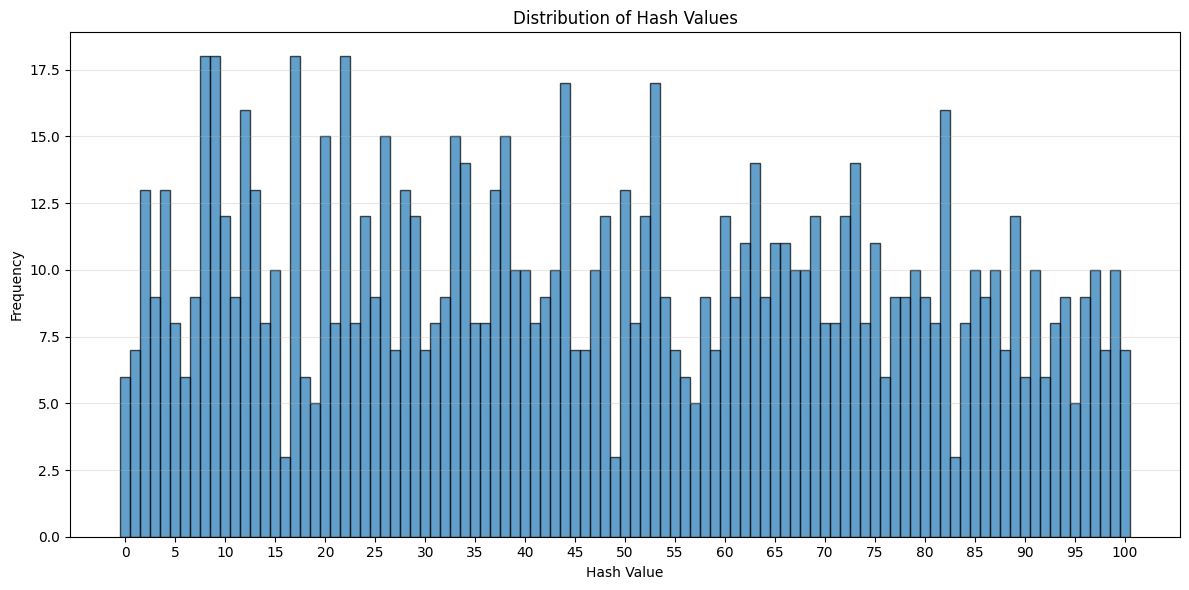

In [15]:
"""The visualization shows how well the hash values are distributed across the available range, which relates 
    directly to the efficiency of the hash function.
"""
plt.figure(figsize=(12, 6))
plt.hist(hashes, bins=np.arange(0, 102) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Hash Values')
plt.xlabel('Hash Value')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Limitations**

This hash function has several limitations:
- The small range(0-100) means collisions are inevitable with larger input sets
- The alogorithm is simple and doesnt cause the small changes in input causing large changes in output.
- For very long strings, integer overflow might be a concern in languages with fixed-size integers.

**Real-world Applications**

This hash function was designed for hash tables in C programs where:
- Speed is more important than cryptographic security
- The data set size is relatively small compared to the hash table size
- A simple implementation is preferred over complex algorithms.

# Task 3: SHA256 Padding

SHA-256 is part of the SHA-2 cryptographic hash functions family designed by the NSA. The padding scheme is critical to the security of the hash function, as it ensures messages of different lengths produce fixed-size digests through a well-defined process.

### Padding Algorithm Explanation

The SHA-256 padding scheme follows these steps:

1. **Append a '1' bit**: The algorithm starts by appending a single '1' bit to the message.

2. **Append '0' bits**: Next, enough '0' bits are appended so that the length of the message (in bits) becomes congruent to 448 modulo 512. This ensures that after padding, the message length is exactly 64 bits (8 bytes) short of being a multiple of 512 bits.

3. **Append length**: Finally, the original message length (before padding) is appended as a 64-bit big-endian integer.

The resulting padded message will have a length that is an exact multiple of 512 bits, which is necessary for the SHA-256 hash algorithm to process the message in fixed-size blocks.


### Implementation Details

In the implementation:

- We read the file content in binary mode to handle any file type
- We calculate the original length in bits (8 bits per byte)
- We start the padding with 0x80 (binary 10000000), which represents the required '1' bit followed by 7 '0' bits
- We calculate how many additional zero bytes are needed to reach the required length
- We append the original message length as a 64-bit big-endian integer

In [16]:
"""
    Calculate the SHA-256 padding that would be applied to a file.
    
    Args:
        file_path (str): Path to the file to calculate padding for
        
    Returns:
        bytes: The padding that would be applied to the file
        
    According to FIPS 180-4 (Secure Hash Standard), the padding consists of:
    1. A '1' bit
    2. Enough '0' bits so the total message length in bits is congruent to 448 modulo 512
    3. The original message length as a 64-bit big-endian integer
    """
def calculate_sha256_padding(file_path):
    # Read the file contents
    try:
        with open(file_path, 'rb') as file:
            content = file.read()
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except Exception as e:
        print(f"Error reading file: {e}")
        return None
    
    # Calculate the length of the original message in bits
    original_length_bits = len(content) * 8

    # Calculate the padding
    # Start with the mandatory '1' bit (as a byte 0x80 = binary 10000000)
    padding = bytearray([0x80])

    # Calculate how many zero bytes we need
    # We need the final message length to be a multiple of 512 bits (64 bytes)
    # The last 8 bytes are reserved for the length field
    # So we need: original_length + 1 + padding_zeros + 8 ≡ 0 (mod 64)
    # Therefore: padding_zeros = 64 - ((original_length + 1 + 8) % 64)
    # If the result is 64, we set it to 0 (already a multiple of 64)
    padding_zeros = 56 - (len(content) + 1) % 64 # 56 = 64 - 8
    if padding_zeros < 0:
        padding_zeros += 64 # Ensure positive 
    
    # Add the zero bytes
    padding.extend([0] * padding_zeros)

    # Add the original length as a 64-bit big-endian integer
    # Convert original length to 8 bytes (64 bits)
    length_bytes = original_length_bits.to_bytes(8, byteorder='big')
    padding.extend(length_bytes)

    return bytes(padding)



### Example Calculation

For the string "abc":
- Original length: 3 bytes = 24 bits
- After adding the '1' bit (as byte 0x80): 4 bytes
- After adding zero padding to reach 56 bytes (448 bits): 56 bytes
- After adding the length field (8 bytes): 64 bytes = 512 bits

This gives us exactly one 512-bit block for the SHA-256 algorithm to process.

In [17]:
"""
    Print the padding bytes in hexadecimal format, with 26 bytes per line.
    
    Args:
        padding (bytes): The padding bytes to print
"""
def print_padding_hex(padding):
    if padding is None:
        return
    
    # Format each byte as a two-character hex string (e.g., '80' for byte 128)
    hex_values = [f"{b:02X}" for b in padding]
    
    # Print 26 bytes per line as in the example
    line_length = 26
    for i in range(0, len(hex_values), line_length):
        line = hex_values[i:i+line_length]
        print(" ".join(line))

In [18]:
# Calculate and print the padding
print("SHA-256 padding for a file containing 'abc':")
padding = calculate_sha256_padding('./temp.txt')
print_padding_hex(padding)


SHA-256 padding for a file containing 'abc':
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 18


### References

1. **National Institute of Standards and Technology (2015).** *FIPS PUB 180-4: Secure Hash Standard (SHS)*. [https://doi.org/10.6028/NIST.FIPS.180-4](https://doi.org/10.6028/NIST.FIPS.180-4)
   - Official specification for the SHA-256 algorithm including the padding scheme


# Task 4: Prime Numbers

### Algorithm 1: Trial Division

The simplest approach to finding prime numbers is trial division. For each number, we check if it's divisible by any integer from 2 up to the square root of that number. If no such divisor is found, the number is prime.

In [19]:

def is_prime_trial_division(n):
    """
    Check if a number is prime using trial division algorithm.
    
    Args:
        n (int): The number to check
        
    Returns:
        bool: True if the number is prime, False otherwise
    """
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n %  3 == 0:
        return False
    
    for i in range(5, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    
    return True

print(is_prime_trial_division(29))  
print(is_prime_trial_division(30))

True
False


**How it works:**
- Prime numbers are **greater than 1**
- If `n` is **less than 2**, it's automatically not prime.
- 2 and 3 are prime numbers
- Even numbers (except `2`) are not prime (e.g., 4, 6, 8, 10)
- Multiples of `3` (except `3` itself) are not prime (e.g., 9, 15, 21)
- Check up to $\sqrt{n}$:
    - If `n` is not prime, it must have a factor $\leq$ $\sqrt{n}$
    - Example: $36 = 6 \times 6$, Only need to check up to `6`
- Start from `5` and skip even numbers?
    - Already checked `2` and `3`, so only need to check **odd numbers** `(5, 7, 9,11, 13, ...)`
    - The `range(5, sqrt(n) + 1, 2)` skips even numbers, reducing computations by 50%
- If no factors are found up to $\sqrt{n}$, then `n` is prime

**Advantages:**
- Work wells for checking individual numbers
- Memory efficient (constant space complexity)

**Disadvantages:**
- Inefficient for finding multiple primes
- Time complexity of $O(\sqrt{n})$ when finding n primes


### Algorithm 2: Sieve of Eratosthenes

The Sieve of Eratosthenes is an ancient algorithm for finding all prime numbers up to any given limit. It works by iteratively marking as composite (non-prime) the multiples of each prime, starting from 2. The multiples of a given prime are generated starting from the prime itself, as a sequence of numbers with the same difference, equal to that prime.

This algorithm is much more efficient than trial division when finding multiple prime numbers within a range.

In [20]:
def sieve_of_eratosthenes(n):
    """
    Find all prime numbers up to a given limit using the Sieve of Eratosthenes.
    
    Args:
        limit (int): Upper bound of range to check for primes
        
    Returns:
        list: All prime numbers up to the limit
    """
    is_prime = [True] * (n + 1)  # Step 1
    is_prime[0], is_prime[1] = False, False  # 0 and 1 are not prime
    
    for i in range(2, int(n**0.5) + 1):  # Step 5: Loop up to sqrt(n)
        if is_prime[i]:  # If i is still marked as prime
            for j in range(i * i, n + 1, i):  # Step 3: Mark multiples of i
                is_prime[j] = False

    # Collecting the prime numbers
    primes = [i for i in range(n + 1) if is_prime[i]]
    return primes

# Example usage
n = 50
print(sieve_of_eratosthenes(n))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


**How it works:**
- Create a list is_prime of size `n+1`, where every index initially holds True.
- Purpose of this list is to track whether a number is prime (`True`) or not (`False`)
- Explicitly set `is_prime[0]` and `is_prime[1]` to False because **0 and 1 are not prime**.
- Loop through numbers starting from 2 up to $\sqrt{n}$
- **Why up to $\sqrt{n}$ ?**:
    - If a number $n$ is **not** prime, it **must** have a factor $a \leq b$ $\sqrt{n}$
    - Example: If $n = 36$, its smallest factor greater than $\sqrt{36} = 6$ is 6 itself, meaning all smaller factors would already be checked.
    - Thus, it is sufficient to check up to $\sqrt{n}$ to find all prime numbers.

- If `i` is still marked `True`, it means `i` is prime.
- Mark all multiples of `i` as `False`, starting from $i^2$ (since any smaller multiple would have already been marked by a smaller prime).
- **Why start from $i^2$?**
    - Because smaller multiplies of `i` (like $2 \times i, 3 \times i$) would hav ealready been marked by previous prime numbers.
    - Example: For `i = 5`, numbers 10, 15, 20 were already marked when processing `i = 2` and `i = 3`, so we start at $5^2 = 25$
- Go through the list `is_prime` and collect all indices that are still `True` (these are the prime numbers).
- Final output is a list of all primes up to `n`

**Advantages:**
- Very efficient for finding all primes in a range
- Time complexity of $O(n \log{\log{n}})$ for finding all primes up to n

**Disadvantages:**
- Requires more memory (space complexity of $O(n)$)
- Needs a good estimate of the upper bound when finding n primes

# References

1. GeeksforGeeks. "Trial Division Algorithm for Prime Factorization."
   - Provides comprehensive explanation of the trial division algorithm with implementation details
   - Offers analysis of the algorithm's time complexity and efficiency
   - https://www.geeksforgeeks.org/trial-division-algorithm-for-prime-factorization/

2. Brilliant.org. "Sieve of Eratosthenes."
   - Contains mathematical proof and historical context for the Sieve algorithm
   - Explains why starting from i² is more efficient in the inner loop
   - Provides detailed complexity analysis showing O(n log log n) runtime
   - Includes visualizations that aid in understanding how the algorithm works
   - https://brilliant.org/wiki/sieve-of-eratosthenes/

## Task 5: Calculating Square Root Bits
In this task, I calculated the first 32 bits of the fractional part of the square roots of the first 100 prime numbers.

In [ ]:
# For Task 5, reusing the sieve function from Task 4
# First, generate enough primes to get at least 100
primes = sieve_of_eratosthenes(550)[:100]  # Take just the first 100 primes
print(primes)

# verify the number of primes
print(f"Number of primes: {len(primes)}")

100


When calculating the square root of a number, we get an integer part and a fractional part:
√n = ⌊√n⌋ + (fractional part)

For example, √2 = 1.4142... where:
- Integer part: 1
- Fractional part: 0.4142...

For prime numbers (except 2), the square root is always irrational, meaning the fractional part continues infinitely without repeating.


To calculate the binary representation of a fractional part:

1. Start with the fractional part f (0 ≤ f < 1)
2. Multiply f by 2
   - If the result ≥ 1, record a 1 bit and subtract 1
   - If the result < 1, record a 0 bit
3. Repeat step 2 with the new fractional part for the desired number of bits

This algorithm is equivalent to expressing the fraction as powers of 1/2:
f = b₁×(1/2) + b₂×(1/4) + b₃×(1/8) + ... + bₙ×(1/2ⁿ)

Where each bᵢ is either 0 or 1, forming our binary fraction.

In [ ]:
def get_fractional_bits(number, num_bits=32):
    """
    Calculate the first num_bits bits of the fractional part of the square root of a number.
    
    Args:
        number (int): The number to find the square root of
        num_bits (int): Number of bits to calculate in the fractional part
        
    Returns:
        str: Binary string representing the fractional part
    """
    # Calculate the square root
    sqrt_value = math.sqrt(number)
    
    # Get just the fractional part
    fractional_part = sqrt_value - int(sqrt_value)
    
    # Calculate binary representation of fractional part
    binary_fraction = ""
    for _ in range(num_bits):
        # Multiply by 2 and check if result is >= 1
        fractional_part *= 2
        if fractional_part >= 1:
            binary_fraction += "1"
            fractional_part -= 1
        else:
            binary_fraction += "0"
    
    return binary_fraction


### Implementation

My implementation uses the algorithm described above to calculate the first 32 bits of the fractional part of the square roots. The `get_fractional_bits()` function:
1. Calculates the square root using the `math.sqrt()` function
2. Extracts just the fractional part
3. Applies the binary fraction algorithm to obtain 32 bits

In [26]:
# Calculate fractional bits for all 100 primes
sqrt_bits_results = []
for i, prime in enumerate(primes):
    bits = get_fractional_bits(prime, 32)
    sqrt_bits_results.append(bits)
    print(f"{i+1}. √{prime} fractional bits: {bits}")

1. √2 fractional bits: 01101010000010011110011001100111
2. √3 fractional bits: 10111011011001111010111010000101
3. √5 fractional bits: 00111100011011101111001101110010
4. √7 fractional bits: 10100101010011111111010100111010
5. √11 fractional bits: 01010001000011100101001001111111
6. √13 fractional bits: 10011011000001010110100010001100
7. √17 fractional bits: 00011111100000111101100110101011
8. √19 fractional bits: 01011011111000001100110100011001
9. √23 fractional bits: 11001011101110111001110101011101
10. √29 fractional bits: 01100010100110100010100100101010
11. √31 fractional bits: 10010001010110010000000101011010
12. √37 fractional bits: 00010101001011111110110011011000
13. √41 fractional bits: 01100111001100110010011001100111
14. √43 fractional bits: 10001110101101000100101010000111
15. √47 fractional bits: 11011011000011000010111000001101
16. √53 fractional bits: 01000111101101010100100000011101
17. √59 fractional bits: 10101110010111111001000101010110
18. √61 fractional bits: 11

### References
1. Weisstein, Eric W. "Square Root." From MathWorld--A Wolfram Web Resource.
   - Contains information about properties of square roots and their representation
   - https://mathworld.wolfram.com/SquareRoot.html

## Task 6 Proof of Work

### Implement Approach
To find English words with the most leading zero bits in their SHA256 hash:

1. **Hash Generation**: Each word is encoded to UTF-8 bytes and hashed using SHA256.
2. **Bit Counting**: A custom function counts the number of consecutive zero bits at the beginning of each hash.
3. **Dictionary Processing**: An English dictionary file is processed to examine all possible words.

In [ ]:
def count_leading_zero_bits(byte_string):
    count = 0
    for byte in byte_string:
        # Count leading zeros in the byte
        if byte == 0:
            count += 8
            continue
        
        # Count bits in the first non-zero byte
        temp = byte
        for _ in range(8):
            if temp & 0x80 == 0:  # Check if the leftmost bit is 1
                return count
            count += 1
            temp <<= 1
        
        return count
    
    return count

### Leading Zero Bits Counting

The `count_leading_zero_bits` function works by:
1. Checking each byte from the beginning of the hash
2. If the byte is 0x00, adding 8 to the count and continuing
3. For the first non-zero byte, counting the leading zero bits within that byte
4. Returning the total number of leading zero bits

In [8]:
# Calculate SHA256 hash of a word
def sha256_hash(word):

    #Encode the word as UTF-8 bytes and calculate the SHA-256 hash
    return hashlib.sha256(word.encode('utf-8')).digest()

In [ ]:
# Find the words with the most leading zero bits in their SHA256 hash
def find_best_words(dictionary_file, top_n=10):
    """
    Find the words with the most leading zero bits in their SHA256 hash.
    
    Args:
        dictionary_file (str): Path to dictionary file with one word per line
        top_n (int): Number of top words to return
        
    Returns:
        list: List of (word, zero_bits) tuples sorted by zero_bits (descending)
    """
    results = []
    

    try:
        with open(dictionary_file, 'r', encoding='utf-8', errors='ignore') as f:
            total_words = sum(1 for _ in f)
        
        # Reset file pointer
        with open(dictionary_file, 'r', encoding='utf-8', errors='ignore') as f:
            count = 0
            for i, line in enumerate(f):
                # Extract word and remove whitespace
                word = line.strip().lower()
                
                # Skip empty lines
                if not word:
                    continue
                
                # Calculate hash and count leading zeros
                hash_digest = sha256_hash(word)
                zero_bits = count_leading_zero_bits(hash_digest)
                
                # Store result
                results.append((word, zero_bits))
                
                # Show progress every 10,000 words
                count += 1
                if count % 10000 == 0:
                    print(f"Processed {count}/{total_words} words ({count/total_words:.1%})")
        
        # Sort by number of leading zeros (descending)
        results.sort(key=lambda x: x[1], reverse=True)
        
        return results[:top_n]
    
    except FileNotFoundError:
        print(f"Dictionary file '{dictionary_file}' not found.")
        return []

### Function of finding words with the most leading zero bits

1. **Input Parameters**:
   - `dictionary_file`: Path to a text file containing one word per line
   - `top_n`: Number of top-performing words to return (default: 10)

2. **Dictionary Processing**:
   - The function first counts the total number of words in the dictionary for progress reporting
   - It then reopens the file and processes each word individually
   - Words are converted to lowercase and stripped of whitespace for consistency
   - Empty lines are skipped

3. **Hash Calculation**:
   - For each word, we calculate its SHA-256 hash using the `sha256_hash` function
   - This produces a 256-bit (32-byte) digest unique to that word

4. **Counting Leading Zeros**:
   - The `count_leading_zero_bits` function examines the hash digest byte by byte
   - It counts consecutive zero bits from the beginning of the hash
   - This represents how "lucky" the word is in terms of hash output

5. **Results Collection**:
   - Each word and its leading zero bit count are stored as tuples in the `results` list
   - Progress updates are printed every 10,000 words to track performance

6. **Sorting and Filtering**:
   - After processing all words, results are sorted by the number of leading zeros (descending)
   - Only the top `n` words with the most leading zeros are returned

7. **Error Handling**:
   - If the dictionary file is not found, an appropriate error message is displayed
   - The function safely returns an empty list in case of errors

In [9]:
# Download a dictionary file if we don't have one
dictionary_path = "english_words.txt"

if not os.path.exists(dictionary_path):
    print("Downloading English dictionary...")
    import urllib.request
    # Using a commonly available word list
    urllib.request.urlretrieve(
        "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt", 
        dictionary_path
    )
    print(f"Downloaded dictionary to {dictionary_path}")

# Find words with most leading zero bits
print("Finding words with most leading zero bits...")
top_words = find_best_words(dictionary_path, top_n=20)

# Display results
print("\nWords with most leading zero bits in SHA256 hash:")
print("-" * 50)
print("| Word                | Leading Zero Bits | Hexadecimal Prefix |")
print("|" + "-" * 20 + "|" + "-" * 18 + "|" + "-" * 20 + "|")

for word, zeros in top_words:
    # Get the first few bytes of the hash to show the hex representation
    hash_hex = hashlib.sha256(word.encode('utf-8')).hexdigest()
    hex_prefix = hash_hex[:8]  # Show first 4 bytes (8 hex characters)
    print(f"| {word:<20} | {zeros:<16} | 0x{hex_prefix}{'...':>12} |")
    
print("-" * 50)

# Verify that the top word is in the dictionary
top_word = top_words[0][0]
with open(dictionary_path, 'r', encoding='utf-8', errors='ignore') as f:
    dictionary_content = f.read()
    
if top_word in dictionary_content.split():
    print(f"\nVerification: '{top_word}' is confirmed to be in the dictionary file.")
else:
    print(f"\nVerification failed: '{top_word}' could not be found in the dictionary.")

Finding words with most leading zero bits...
Processed 10000/466550 words (2.1%)
Processed 20000/466550 words (4.3%)
Processed 30000/466550 words (6.4%)
Processed 40000/466550 words (8.6%)
Processed 50000/466550 words (10.7%)
Processed 60000/466550 words (12.9%)
Processed 70000/466550 words (15.0%)
Processed 80000/466550 words (17.1%)
Processed 90000/466550 words (19.3%)
Processed 100000/466550 words (21.4%)
Processed 110000/466550 words (23.6%)
Processed 120000/466550 words (25.7%)
Processed 130000/466550 words (27.9%)
Processed 140000/466550 words (30.0%)
Processed 150000/466550 words (32.2%)
Processed 160000/466550 words (34.3%)
Processed 170000/466550 words (36.4%)
Processed 180000/466550 words (38.6%)
Processed 190000/466550 words (40.7%)
Processed 200000/466550 words (42.9%)
Processed 210000/466550 words (45.0%)
Processed 220000/466550 words (47.2%)
Processed 230000/466550 words (49.3%)
Processed 240000/466550 words (51.4%)
Processed 250000/466550 words (53.6%)
Processed 260000/4

### Dictionary Preparation

1. **Checks for Existing Dictionary**:
   - Looks for a file named "english_words.txt" in the current directory
   - If not found, proceeds to download one automatically

2. **Automatic Dictionary Download**:
   - Uses the `urllib` library to retrieve a well-established English word list
   - Sources the dictionary from the GitHub repository "dwyl/english-words"
   - This repository contains a comprehensive collection of English words
   - Saves the dictionary locally for processing and future use

### Executing the Word Search

With the dictionary ready, the program:

1. **Initiates the Search Process**:
   - Calls the `find_best_words` function with the dictionary path
   - Requests the top 20 words with the most leading zero bits
   - Displays progress messages to track the execution

2. **Presenting Results**:
   - Creates a formatted table to display the findings
   - For each word, shows:
     - The word itself
     - Number of leading zero bits in its SHA-256 hash
     - The hexadecimal prefix of the hash (first 8 characters)
   - This presentation makes it easy to verify the results

### Verification Process

The implementation includes a critical verification step:

1. **Dictionary Validation**:
   - Takes the top-performing word (with the most leading zeros)
   - Opens the original dictionary file
   - Checks if the word actually exists in the dictionary
   - Confirms that the result is a legitimate English word

2. **Verification Output**:
   - Prints a confirmation message if the word is found
   - Reports a verification failure if the word is not found
   - This step addresses the task requirement to prove dictionary inclusion

### References

1. NIST (2015). "Secure Hash Standard (SHS)." FIPS PUB 180-4.
   - https://doi.org/10.6028/NIST.FIPS.180-4
   - Official specification of the SHA256 algorithm used in this task

2. Dwyl. "English Words." GitHub Repository.
   - https://github.com/dwyl/english-words
   - Source of the English dictionary used for verification

## Task 7 Turing Machines

This implementation models a Turing Machine that adds 1 to a binary number. While the `binary_plus_one` function uses a procedural approach rather than explicitly modeling tape movement, it follows the same algorithmic logic a Turing Machine would use.


Turing Machince consits of:

1. A tape divided into cells (one symbol per cell)
2. A head that can read/write symbols and move left or right
3. A state register that stores the current state
4. A transition function that tells the machine what to do based on current state and symbol read

#### How the Algorithm Works:

1. **Right-to-Left Processing**: Just as a Turing Machine would start from the least significant bit, we process digits from right to left.

2. **State-Based Logic**: The carry bit (0 or 1) represents the "state" of our computation:
   - If carry=1 and current digit=0, write 1 and set carry=0 (terminal state)
   - If carry=1 and current digit=1, write 0 and keep carry=1 (continue in carry state)

3. **Handling Overflow**: If we reach the leftmost digit with a carry still active, we need to add a new '1' digit at the beginning, just as a Turing Machine would extend its tape.


This function:

1. Takes a binary number as a string
2. Processes each digit from right to left
3. Follows the binary addition rules (0+1=1, 1+1=0 with carry)
4. Adds a new leading digit if needed
5. Returns the resulting binary number

In [1]:
def binary_plus_one(binary_str):

    # Convert the list for manipulation
    binary_list = list(binary_str)

    # Start from the rightmost digit (least significant bit)
    i = len(binary_list) - 1
    carry = 1

    # Process each digit from right to left
    while i >= 0 and carry > 0:
        if binary_list[i] == '0':
            binary_list[i] = '1'
            carry = 0
        # binary_list[i] == '1'
        else:  
            binary_list[i] = '0'
            carry = 1
        i -= 1

    # If we still have a carry, need to add a new digit at the beginning
    if carry > 0:
        binary_list.insert(0, '1')

    # Convert back to string and return
    return ''.join(binary_list)


In [3]:
example = "100111"
result = binary_plus_one(example)
print(f"\nexample: {example} + 1 = {result}")


example: 100111 + 1 = 101000


## References
Turing, A.M. (1936). "On Computable Numbers, with an Application to the Entscheidungsproblem." Proceedings of the London Mathematical Society, 2(42), 230-265.

https://www.cs.virginia.edu/~robins/Turing_Paper_1936.pdf

This reference is particularly valuable for understand the fundamental theoretical basis of computation rather than just the practical implementation details.

# Task 8

Implementation of bubble sort that counts the number of comparisons:

In [ ]:
def bubble_sort(arr):

    # Create a copy of the array to avoid modifying the original
    arr = arr.copy()
    n = len(arr)
    comparisons = 0

    # Traverse through all array elements
    for i in range(n):
        swapped = False

        # Last i elements are already in place
        for j in range(0, n-i-1):
            # Count the comparison
            comparisons += 1

            # Compare adjacent elements
            if arr[j] > arr[j+1]:
                # Swap if needed
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        
        # If no swaps occurred, the array is sorted
        if not swapped:
            break
    return arr, comparisons

In [ ]:
# Generate all permutations of a list of elements
def generate_permutations(elements):
    if len(elements) <= 1:
        return [elements]
    results = []
    for i in range(len(elements)):
        # Take current element
        current = elements[i]
        # Generate permutations of the remaining elements
        remaining = elements[:i] + elements[i+1:]
        remaining_permutations = generate_permutations(remaining)

        # Add current element to each permutation of the remaining elements
        for perm in remaining_permutations:
            results.append([current] + perm)
    
    return results

`generate_permutations` function using a recursive approach to generate all possible permutations of a list of elements.

Here's how the recursion works:

1. **Base case**: If the list has 0 or 1 elements, there's only one possible permutation (the list itself).

2. **Recursive step**: For each element in the list:
    - Take that element as the first element of a permutation
    - Recursively generate all permutations of the remaining elements
    - Append the current element to each of those permutations

The recurrence relation can be expressed as:
- P(n) = n * P(n-1) for n > 1
- P(1) = 1 (base case)

This is a classic recursive implementation of permutation generation, with a time complexity of O(n!) since there are n! possible permutations of n elements.

In [6]:
# L: Original ordered list
def analyze_bubble_sort_permutations(L):

    all_permutations = generate_permutations(L)
    results = []
    for perm in all_permutations:
        sorted_arr, comparisons = bubble_sort(perm)
        results.append((sorted_arr, comparisons))

    # Sort by number of comparisons
    results.sort(key=lambda x: x[1]) 

    # Print results
    print(f"Analysis of bubble sort on all {len(results)} permutations of {L}:")
    print("-" * 50)
    print("| Permutation               | Comparisons |")
    print("|---------------------------|-------------|")
    
    for perm, count in results:
        print(f"| {str(perm):<25} | {count:<11} |")
    
    # Calculate statistics
    comparison_counts = [r[1] for r in results]
    min_comparisons = min(comparison_counts)
    max_comparisons = max(comparison_counts)
    avg_comparisons = sum(comparison_counts) / len(comparison_counts)
    
    print("-" * 50)
    print(f"Minimum comparisons: {min_comparisons}")
    print(f"Maximum comparisons: {max_comparisons}")
    print(f"Average comparisons: {avg_comparisons:.2f}")


In [11]:
L = [1, 2, 3, 4]
analyze_bubble_sort_permutations(L)

Analysis of bubble sort on all 24 permutations of [1, 2, 3, 4]:
--------------------------------------------------
| Permutation               | Comparisons |
|---------------------------|-------------|
| [1, 2, 3, 4]              | 3           |
| [1, 2, 3, 4]              | 5           |
| [1, 2, 3, 4]              | 5           |
| [1, 2, 3, 4]              | 5           |
| [1, 2, 3, 4]              | 5           |
| [1, 2, 3, 4]              | 5           |
| [1, 2, 3, 4]              | 5           |
| [1, 2, 3, 4]              | 5           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1, 2, 3, 4]              | 6           |
| [1,

In [ ]:
def plot_comparison_distribution(L):
    """
    Create a histogram of comparison counts for all permutations,
    using the recursive generate_permutations function instead of itertools.
    
    Args:
        L: Original ordered list
    """
    # Generate permutations using your recursive function
    all_permutations = generate_permutations(L)
    comparison_counts = []
    
    for perm in all_permutations:
        # Your bubble_sort function already returns the sorted array and comparison count
        _, count = bubble_sort(perm)
        comparison_counts.append(count)
    
    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(comparison_counts, bins=range(min(comparison_counts), max(comparison_counts) + 2), 
             edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Comparisons in Bubble Sort for Permutations of {L}')
    plt.xlabel('Number of Comparisons')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(range(min(comparison_counts), max(comparison_counts) + 1))
    plt.tight_layout()
    plt.show()
    
    # Print additional statistics
    print(f"Average comparisons: {sum(comparison_counts)/len(comparison_counts):.2f}")
    print(f"Most common comparison count: {max(set(comparison_counts), key=comparison_counts.count)}")
    print(f"Number of permutations analyzed: {len(comparison_counts)}")



In [ ]:
#generate and display the plot
plot_comparison_distribution(L)

## References:
1. GeeksforGeeks. "Bubble Sort." https://www.geeksforgeeks.org/bubble-sort/
    - Offers comprehensive visualization, optimization techniques, and practical applications of bubble sort
        